In [39]:
import json
import pandas as pd

In [2]:
with open("analysis.json", 'r') as f:
    prog_dict = json.loads(f.read())

In [3]:
prog_dict

{'modules': {},
 'fdefs': {'fdef_1': {'name': 'partition',
   'retval': None,
   'lineno': 4,
   'args': ['arr', 'low', 'high'],
   'body': {},
   'ncalls': '4999',
   'tot_time': '0.020',
   'cum_time': '0.020',
   'line_profile': {'line_8': {'hits': '4999',
     'time': '6.00E-04',
     'time_per_hit': '1.20E-07',
     '%time': '3.0',
     'contents': 'pivot = arr[(high+low)//2]'},
    'line_9': {'hits': '4999',
     'time': '4.00E-04',
     'time_per_hit': '8.00E-08',
     '%time': '2.0',
     'contents': 'i = low - 1'},
    'line_10': {'hits': '4999',
     'time': '3.80E-04',
     'time_per_hit': '7.60E-08',
     '%time': '1.9',
     'contents': 'j = high + 1'},
    'line_12': {'hits': '4999',
     'time': '3.40E-04',
     'time_per_hit': '6.80E-08',
     '%time': '1.7',
     'contents': 'while True:'},
    'line_13': {'hits': '26157',
     'time': '2.02E-03',
     'time_per_hit': '7.72E-08',
     '%time': '10.1',
     'contents': 'i += 1'},
    'line_14': {'hits': '39985',
     't

In [4]:
def display_fdef_info(fdefs):
    for fdef_key in fdefs.keys():
        fdef_dict = fdefs[fdef_key]
        name = fdef_dict["name"]
        tot_time = fdef_dict["tot_time"]
        cum_time = fdef_dict["cum_time"]
        lprof_dict = fdef_dict["line_profile"]
        print("Function {0}: cum_time = {1}".format(name, cum_time))
        for l_key in lprof_dict.keys():
            l_dict = lprof_dict[l_key]
            hits = l_dict["hits"]
            time = l_dict["time"]
            percent_time = l_dict["%time"]
            contents = l_dict["contents"]
            print("{0}: contents = {1} | hits = {2} | time = {3} | %time = {4}".format(
                l_key, contents, hits, time, percent_time))
        print()

In [5]:
display_fdef_info(prog_dict.get("fdefs"))

Function partition: cum_time = 0.020
line_8: contents = pivot = arr[(high+low)//2] | hits = 4999 | time = 6.00E-04 | %time = 3.0
line_9: contents = i = low - 1 | hits = 4999 | time = 4.00E-04 | %time = 2.0
line_10: contents = j = high + 1 | hits = 4999 | time = 3.80E-04 | %time = 1.9
line_12: contents = while True: | hits = 4999 | time = 3.40E-04 | %time = 1.7
line_13: contents = i += 1 | hits = 26157 | time = 2.02E-03 | %time = 10.1
line_14: contents = while arr[i] < pivot: | hits = 39985 | time = 3.64E-03 | %time = 18.2
line_15: contents = i += 1 | hits = 13828 | time = 1.10E-03 | %time = 5.5
line_16: contents = j -= 1 | hits = 26157 | time = 2.08E-03 | %time = 10.4
line_17: contents = while arr[j] > pivot: | hits = 39388 | time = 3.60E-03 | %time = 18.0
line_18: contents = j -= 1 | hits = 13231 | time = 1.08E-03 | %time = 5.4
line_19: contents = if i >= j: | hits = 26157 | time = 2.02E-03 | %time = 10.1
line_20: contents = return j | hits = 4999 | time = 3.40E-04 | %time = 1.7
line_

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [35]:
def scatter_fdef_info(fdefs):
    count = 0
    counts = []
    hits_list = []
    time_list = []
    fnames = []
    for fdef_key in fdefs.keys():
        fdef_dict = fdefs[fdef_key]
        name = fdef_dict["name"]
        tot_time = fdef_dict["tot_time"]
        cum_time = fdef_dict["cum_time"]
        lprof_dict = fdef_dict["line_profile"]

        for l_key in lprof_dict.keys():
            l_dict = lprof_dict[l_key]
            hits = l_dict["hits"]
            time = l_dict["time"]
            percent_time = l_dict["%time"]
            contents = l_dict["contents"]
            time_list.append(float(time) * 100000)
            count += 1
            counts.append(count)
            hits_list.append(int(hits))
            fnames.append(name)
        print()
        
    plt.ylim([-10000, max(hits_list)+10000])
    c = ["r" if fname == "quickSort" else "b" if fname == "partition" else 'k' for fname in fnames]

    plt.axis('off')
    plt.scatter(counts, hits_list, s=time_list, c=c)
    plt.plot(counts, hits_list)

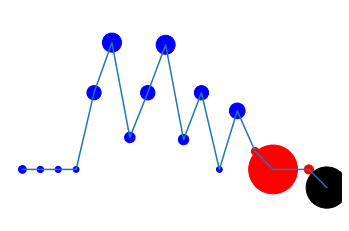

In [36]:
scatter_fdef_info(prog_dict.get("fdefs"))

In [111]:
import json
df = pd.read_json('analysis.json')
fdf1 = pd.DataFrame(df["fdefs"]["fdef_1"]["line_profile"]).T
fdf1.dtypes
for col in fdf1.columns:
    if col != 'contents':
        fdf1[col] = fdf1[col].astype('float64')
fdf1

,hits,time,time_per_hit,%time,contents
line_8,4999.0,0.00060,1.200000e-07,3.0,pivot = arr[(high+low)//2]
line_9,4999.0,0.00040,8.000000e-08,2.0,i = low - 1
line_10,4999.0,0.00038,7.600000e-08,1.9,j = high + 1
line_12,4999.0,0.00034,6.800000e-08,1.7,while True:
line_13,26157.0,0.00202,7.720000e-08,10.1,i += 1
line_14,39985.0,0.00364,9.100000e-08,18.2,while arr[i] < pivot:
line_15,13828.0,0.00110,7.950000e-08,5.5,i += 1
line_16,26157.0,0.00208,7.950000e-08,10.4,j -= 1
line_17,39388.0,0.00360,9.140000e-08,18.0,while arr[j] > pivot:
line_18,13231.0,0.00108,8.160000e-08,5.4,j -= 1


<AxesSubplot:xlabel='%time', ylabel='index'>

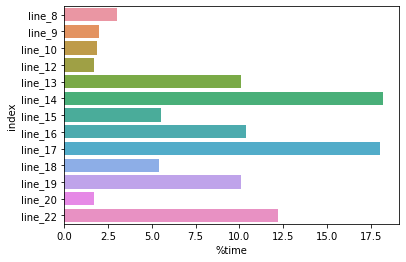

In [114]:
import seaborn as sns
#fdf1.plot(kind="bar", figsize=(12,6), stacked=True)
sns.barplot(data=fdf1.reset_index(), x='%time', y='index')  
    

In [76]:
make_fdef_df(prog_dict.get("fdefs"))

    line_8  line_9  line_10  line_12  line_13  line_14  line_15  line_16  \
0      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12     NaN  

""
